<a href="https://colab.research.google.com/github/jstawarz/Final_Ski_Resort/blob/Fabiana/The_final_wordplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#make change

## Dependencies



In [ ]:
%pip install yarl
%pip install unidecode
%pip install texthero===1.0.5
%pip install scattertext
%pip install -U gensim
#!pip install gensim.sklearn_api
# Download from Google Drive
import gdown
import pandas as pd
from yarl import URL
import plotly.express as px
import texthero as hero
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import scattertext as st
import nltk

In [ ]:
!pip install gdown

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Access files

In [ ]:
access dowloaded file in colab
import numpy as np
neg_df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/top_negative_words.csv')

neg_df =pd.read_csv('/content/top_negative_words.csv')

In [ ]:
neg_df.head()


,word,count
0,ski,404
1,great,189
2,mountain,184
3,snow,139
4,lift,186


In [ ]:
#posi_df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/top_positive_words.csv')

posi_df =pd.read_csv('/content/top_positive_words.csv')

In [ ]:
posi_df

,word,count
0,ski,1236
1,great,618
2,mountain,541
3,lift,529
4,day,400
...,...,...
79,intermediate,51
80,pretty,51
81,season,51
82,enjoyed,50


In [ ]:
#Poword='/content/drive/MyDrive/Colab Notebooks/top_positive_words.csv'
Poword='/content/top_positive_words.csv'
poshow = pd.read_csv(Poword, index_col=None, header=0)


In [ ]:
#Neword='/content/drive/MyDrive/Colab Notebooks/top_negative_words.csv'
Neword='/content/top_negative_words.csv'
neshow = pd.read_csv(Neword, index_col=None, header=0)

In [ ]:
poshow.shape

(84, 2)

In [ ]:
neshow.shape

(73, 2)

In [ ]:
#pos_url='/content/drive/MyDrive/Colab Notebooks/top_positive_words.csv'
pos_url='/content/top_positive_words.csv'
#neg_url='/content/drive/MyDrive/Colab Notebooks/top_negative_words.csv'
neg_url='/content/top_negative_words.csv'

## Data Handling

In [ ]:
poshow['pageUrl']='/content/drive/MyDrive/Colab Notebooks/top_positive_words.csv'
poshow

,word,count,pageUrl
0,ski,1236,/content/drive/MyDrive/Colab Notebooks/top_pos...
1,great,618,/content/drive/MyDrive/Colab Notebooks/top_pos...
2,mountain,541,/content/drive/MyDrive/Colab Notebooks/top_pos...
3,lift,529,/content/drive/MyDrive/Colab Notebooks/top_pos...
4,day,400,/content/drive/MyDrive/Colab Notebooks/top_pos...
...,...,...,...
79,intermediate,51,/content/drive/MyDrive/Colab Notebooks/top_pos...
80,pretty,51,/content/drive/MyDrive/Colab Notebooks/top_pos...
81,season,51,/content/drive/MyDrive/Colab Notebooks/top_pos...
82,enjoyed,50,/content/drive/MyDrive/Colab Notebooks/top_pos...


In [ ]:
neshow['pageUrl']='/content/drive/MyDrive/Colab Notebooks/top_negative_words.csv'
neshow

,word,count,pageUrl
0,ski,404,/content/drive/MyDrive/Colab Notebooks/top_neg...
1,great,189,/content/drive/MyDrive/Colab Notebooks/top_neg...
2,mountain,184,/content/drive/MyDrive/Colab Notebooks/top_neg...
3,snow,139,/content/drive/MyDrive/Colab Notebooks/top_neg...
4,lift,186,/content/drive/MyDrive/Colab Notebooks/top_neg...
...,...,...,...
68,easy,20,/content/drive/MyDrive/Colab Notebooks/top_neg...
69,rental,20,/content/drive/MyDrive/Colab Notebooks/top_neg...
70,new,20,/content/drive/MyDrive/Colab Notebooks/top_neg...
71,conditions,20,/content/drive/MyDrive/Colab Notebooks/top_neg...


In [ ]:
#create a new column 
poshow['label']="positive"
poshow

,word,count,pageUrl,label
0,ski,1236,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive
1,great,618,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive
2,mountain,541,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive
3,lift,529,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive
4,day,400,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive
...,...,...,...,...
79,intermediate,51,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive
80,pretty,51,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive
81,season,51,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive
82,enjoyed,50,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive


In [ ]:
#create a new column 
neshow['label']="negative"
neshow


,word,count,pageUrl,label
0,ski,404,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative
1,great,189,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative
2,mountain,184,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative
3,snow,139,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative
4,lift,186,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative
...,...,...,...,...
68,easy,20,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative
69,rental,20,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative
70,new,20,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative
71,conditions,20,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative


In [ ]:

all_words_df=pd.concat([neshow, poshow]).reset_index(drop=True)
all_words_df.shape
 

(157, 4)

In [ ]:
#Zeb added this
# drop empty text job records
all_words_df = all_words_df[~all_words_df.word.isna()]

In [ ]:
 analyze_col = "word"
 
 #tokenize text
all_words_df["token"] = all_words_df[analyze_col].apply(st.whitespace_nlp_with_sentences)

all_words_df

,word,count,pageUrl,label,token
0,ski,404,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(ski)
1,great,189,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(great)
2,mountain,184,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(mountain)
3,snow,139,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(snow)
4,lift,186,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(lift)
...,...,...,...,...,...
152,intermediate,51,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(intermediate)
153,pretty,51,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(pretty)
154,season,51,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(season)
155,enjoyed,50,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(enjoyed)


In [ ]:
def get_page_source(url: str):
    return URL(url).host


all_words_df["page_host"] = all_words_df["pageUrl"].apply(get_page_source)



top_pages = all_words_df["page_host"].value_counts()[:20].to_frame()

fig = px.histogram(
    top_pages,
    x=top_pages.index,
    y="page_host",
    labels={"all_words_df": "frequency", "index": "page_host"},
).update_xaxes(
    categoryorder="total descending",
)

fig.show()

In [ ]:
all_words_df["word"] 

0               ski
1             great
2          mountain
3              snow
4              lift
           ...     
152    intermediate
153          pretty
154          season
155         enjoyed
156             bar
Name: word, Length: 157, dtype: object

## Visual 1 - WordCloud 

In [ ]:
#
# # Clean text
nltk.download('stopwords')

all_words_df["word"] = all_words_df["word"].pipe(hero.clean)

# Turn a list of text into a string
word = " ".join(all_words_df["word"].values)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/texthero/preprocessing.py:46: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/texthero/preprocessing.py:81: FutureWarning:

The default value of regex will change from True to False in a future version.



In [ ]:
#def make_wordcloud(new_text):
#   """'function to make wordcloud"""

wordcloud = WordCloud(
  width=800,
  height=800,
  min_font_size=10,
  background_color="black",
  colormap="Set2",
  #collocation_threshold=1
).generate(word)

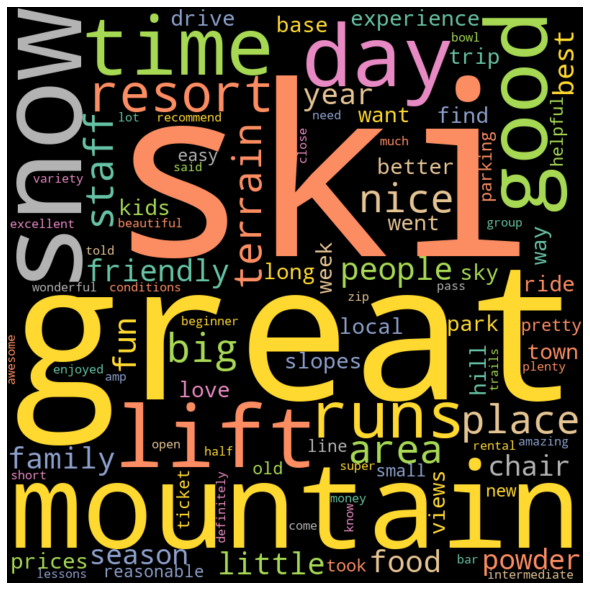

In [ ]:
fig = plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


In [ ]:
#
# # Clean text
nltk.download('stopwords')

#change made here
all_words_df["word"] = all_words_df["word"].pipe(hero.clean)

# Turn a list of text into a string
word = " ".join(all_words_df["word"].values)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/texthero/preprocessing.py:46: FutureWarning:

The default value of regex will change from True to False in a future version.

/usr/local/lib/python3.7/dist-packages/texthero/preprocessing.py:81: FutureWarning:

The default value of regex will change from True to False in a future version.



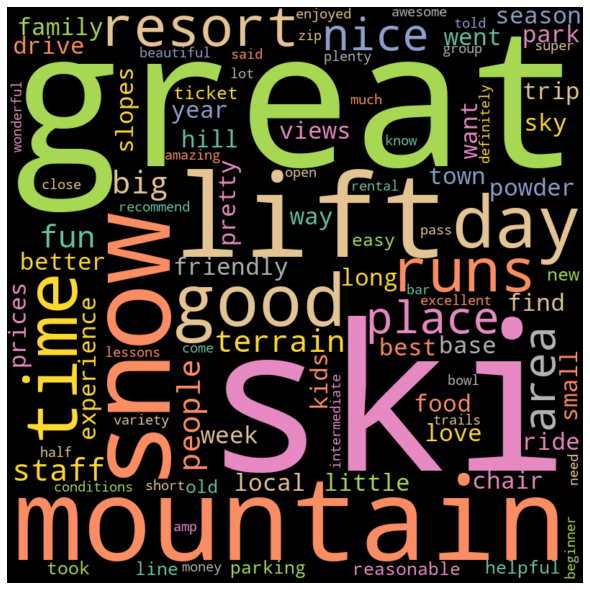

In [ ]:

# Turn a list of text into a string
word = " ".join(all_words_df["word"].values)

def make_wordcloud(new_text):
    """'function to make wordcloud"""

    wordcloud = WordCloud(
        width=800,
        height=800,
        min_font_size=10,
        background_color="black",
        colormap="Set2",
        #collocation_threshold=1
    ).generate(new_text)

    fig = plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show()

    return fig

text_cloud = make_wordcloud(word)

In [ ]:
all_words_df

,word,count,pageUrl,label,token,page_host,text
0,ski,404,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(ski),None,ski
1,great,189,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(great),None,great
2,mountain,184,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(mountain),None,mountain
3,snow,139,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(snow),None,snow
4,lift,186,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(lift),None,lift
...,...,...,...,...,...,...,...
152,intermediate,51,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(intermediate),None,intermediate
153,pretty,51,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(pretty),None,pretty
154,season,51,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(season),None,season
155,enjoyed,50,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(enjoyed),None,enjoyed


In [ ]:
# build a corpus
corpus = (
    st.CorpusFromParsedDocuments(all_words_df, category_col="label", parsed_col="token")
    .build()
    .get_unigram_corpus()
    .compact(st.AssociationCompactor(2000))
)

In [ ]:
all_words_df.label.nunique()

2

## Visual 2 - NLP vector space construct visual

In [ ]:

nltk.download("averaged_perceptron_tagger")

# get DataFrame with terms and their frequency
term_freq_df = corpus.get_term_freq_df()

# Get scaled F-scores of each term in each category
term_freq_df["Positive Score"] = corpus.get_scaled_f_scores("positive")
term_freq_df["Negative Score"] = corpus.get_scaled_f_scores("negative")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
#bottom 2
analyze_col = "requirements"

# Filter out the rows whose requirement is nan
filtered_df = df[~df[analyze_col].isna()][["title", analyze_col, "page_host"]]

# Tokenize text
filtered_df["parse"] = filtered_df[analyze_col].apply(st.whitespace_nlp_with_sentences)
# build a corpus
corpus = (
    st.CorpusFromParsedDocuments(filtered_df, category_col="title", parsed_col="parse")
    .build()
    .get_unigram_corpus()
    .compact(st.AssociationCompactor(2000))
)

nltk.download("averaged_perceptron_tagger")

# get DataFrame with terms and their frequency
term_freq_df = corpus.get_term_freq_df()

# Get scaled F-scores of each term in each category
term_freq_df["Data Scientist Score"] = corpus.get_scaled_f_scores("data scientist")
term_freq_df["Data Engineer Score"] = corpus.get_scaled_f_scores("data engineer")


In [ ]:
term_freq_df

,negative freq,positive freq,Positive Score,Negative Score
term,,,,
ski,1,1,0.50,0.50
great,1,1,0.50,0.50
mountain,1,1,0.50,0.50
snow,1,1,0.50,0.50
lift,1,1,0.50,0.50
...,...,...,...,...
wonderful,0,1,0.75,0.25
trails,0,1,0.75,0.25
intermediate,0,1,0.75,0.25


In [ ]:
term_freq_df.sort_values(by="Positive Score", ascending=False).index[:70]

Index(['bar', 'plenty', 'line', 'like', 'lot', 'ticket', 'bowl', 'much',
       'amazing', 'awesome', 'excellent', 'beautiful', 'variety', 'more',
       'come', 'close', 'recommend', 'enjoyed', 'intermediate', 'wonderful',
       'trails', 'lessons', 'short', 'super', 'definitely', 'beginner', 'want',
       'pretty', 'trip', 'local', 'great', 'week', 'park', 'ride', 'easy',
       'small', 'parking', 'took', 'helpful', 'old', 'new', 'reasonable',
       'base', 'find', 'ski', 'sky', 'drive', 'chair', 'powder', 'year',
       'family', 'food', 'little', 'friendly', 'fun', 'people', 'staff', 'big',
       'terrain', 'area', 'nice', 'place', 'resort', 'runs', 'time', 'day',
       'good', 'lift', 'snow', 'mountain'],
      dtype='object', name='term')

In [ ]:

term_freq_df.sort_values(by="Negative Score", ascending=False).index[:80]

Index(['need', 'group', 'open', 'tickets', 'said', 'lines', 'money', 'know',
       'half', 'told', 'amp', 'pass', 'zip', 'rental', 'conditions', 'helpful',
       'local', 'reasonable', 'prices', 'slopes', 'drive', 'sky', 'base',
       'find', 'want', 'trip', 'new', 'great', 'took', 'week', 'park', 'ride',
       'pretty', 'way', 'easy', 'small', 'old', 'parking', 'ski', 'views',
       'kids', 'resort', 'staff', 'big', 'terrain', 'area', 'nice', 'place',
       'runs', 'fun', 'time', 'day', 'long', 'lift', 'snow', 'mountain',
       'people', 'good', 'friendly', 'season', 'little', 'better', 'love',
       'went', 'town', 'experience', 'hill', 'best', 'food', 'powder', 'year',
       'family', 'chair', 'beginner', 'definitely', 'super', 'short',
       'lessons', 'wonderful', 'close'],
      dtype='object', name='term')

In [ ]:
!pip install -U scattertext

In [ ]:
all_words_df

,word,count,pageUrl,label,token,page_host,text
0,ski,404,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(ski),None,ski
1,great,189,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(great),None,great
2,mountain,184,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(mountain),None,mountain
3,snow,139,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(snow),None,snow
4,lift,186,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(lift),None,lift
...,...,...,...,...,...,...,...
152,intermediate,51,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(intermediate),None,intermediate
153,pretty,51,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(pretty),None,pretty
154,season,51,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(season),None,season
155,enjoyed,50,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(enjoyed),None,enjoyed


In [ ]:
all_words_df[all_words_df['label'] == 'negative']

,word,count,pageUrl,label,token,page_host,text
0,ski,404,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(ski),None,ski
1,great,189,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(great),None,great
2,mountain,184,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(mountain),None,mountain
3,snow,139,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(snow),None,snow
4,lift,186,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(lift),None,lift
...,...,...,...,...,...,...,...
68,easy,20,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(easy),None,easy
69,rental,20,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(rental),None,rental
70,new,20,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(new),None,new
71,conditions,20,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(conditions),None,conditions


In [ ]:
all_words_df[all_words_df['label'] == 'positive']

,word,count,pageUrl,label,token,page_host,text
73,ski,1236,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(ski),None,ski
74,great,618,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(great),None,great
75,mountain,541,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(mountain),None,mountain
76,lift,529,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(lift),None,lift
77,day,400,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(day),None,day
...,...,...,...,...,...,...,...
152,intermediate,51,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(intermediate),None,intermediate
153,pretty,51,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(pretty),None,pretty
154,season,51,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(season),None,season
155,enjoyed,50,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(enjoyed),None,enjoyed


In [ ]:
visual2_df = all_words_df.set_index('word')
visual2_df

,count,pageUrl,label,token,page_host,text
word,,,,,,
ski,404,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(ski),None,ski
great,189,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(great),None,great
mountain,184,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(mountain),None,mountain
snow,139,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(snow),None,snow
lift,186,/content/drive/MyDrive/Colab Notebooks/top_neg...,negative,(lift),None,lift
...,...,...,...,...,...,...
intermediate,51,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(intermediate),None,intermediate
pretty,51,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(pretty),None,pretty
season,51,/content/drive/MyDrive/Colab Notebooks/top_pos...,positive,(season),None,season


In [ ]:
term_freq_df['corrected negative freq'] = visual2_df['count'] *  term_freq_df['negative freq']
term_freq_df

ValueError: ignored

In [ ]:
df[df.index.duplicated()]

In [ ]:
#bottom 2
analyze_col = "word"

# Filter out the rows whose requirement is nan
filtered_df = all_words_df[~all_words_df[analyze_col].isna()][["label", analyze_col, "page_host"]]

# Tokenize text
filtered_df["token"] = filtered_df[analyze_col].apply(st.whitespace_nlp_with_sentences)
# build a corpus
corpus = (
    st.CorpusFromParsedDocuments(filtered_df, category_col="label", parsed_col="token")
    .build()
    .get_unigram_corpus()
    .compact(st.AssociationCompactor(2000))
)

nltk.download("averaged_perceptron_tagger")

# get DataFrame with terms and their frequency
term_freq_df = corpus.get_term_freq_df()

# Get scaled F-scores of each term in each category
term_freq_df["Positive Score"] = corpus.get_scaled_f_scores("positive freq")
term_freq_df["Negative Score"] = corpus.get_scaled_f_scores("negative freq")

In [ ]:

term_freq_df

,negative freq,positive freq,Positive Score,Negative Score
term,,,,
ski,1,1,0.50,0.50
great,1,1,0.50,0.50
mountain,1,1,0.50,0.50
snow,1,1,0.50,0.50
lift,1,1,0.50,0.50
...,...,...,...,...
wonderful,0,1,0.75,0.25
trails,0,1,0.75,0.25
intermediate,0,1,0.75,0.25


In [ ]:
#bottom 1
###############

# # Remove terms that are not nouns
# def is_noun(word: str):
# pos = nltk.pos_tag([word])[0][1]
# return pos[:2] == "NN"

# term_freq_df = term_freq_df.loc[map(is_noun, term_freq_df.index)]


term_freq_df.sort_values(by="Positive Score", ascending=False).index[:70]

term_freq_df.sort_values(by="Negative Score", ascending=False).index[:80]

html = st.produce_scattertext_explorer(
    corpus,
    category="positive",
    category_name="Positive Score",
    not_category_name="Negative Score",
    minimum_term_frequency=1,
    pmi_threshold_coefficient=0,
    width_in_pixels=1000,
    metadata=corpus.get_df()["page_host"],
    #transform=st.Scalers.dense_rank,
)
open("positiveXnegative.html", "w").write(html)

import IPython
IPython.display.HTML(filename='positiveXnegative.html')

/usr/local/lib/python3.7/dist-packages/scattertext/Scalers.py:212: RuntimeWarning:

invalid value encountered in true_divide

